# K-Means Clustering

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#loading the iris dataset
df = pd.read_csv('F:/dataset/Iris.csv')
df = df.set_index('Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**Here the features like sepalLengthCm upto petalWidthCm are independent features whereas Species is dependent on the sample values of these features**

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

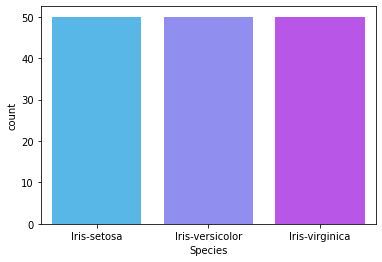

In [3]:
#plots a count of classes present in dependent feature
sns.countplot(df['Species'],palette='cool')

**From the above plot we can see 3 classes of Species. Hence we can estimate the k value for kmeans to be 3.
But for proper justification we use Elbow method**

## Elbow Method

Text(0.5, 1.0, 'Elbow Method')

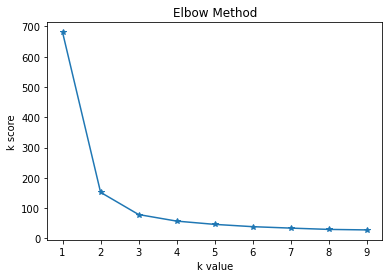

In [4]:
x = df.iloc[:,:4].values
k_score = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i)
    kmean.fit(x)
    k_score.append(kmean.inertia_)

plt.plot(range(1,10),k_score,'*-')
plt.xlabel('k value')
plt.ylabel('k score')
plt.title('Elbow Method')

**In Elbow Method, the point at which the steepness or slope of the curve decreases, such a point/value is selected as k. 
Here k=3**

## K-Means model for k=3

In [5]:
kmeans = KMeans(n_clusters=3)
ymean = kmeans.fit_predict(x)
ymean

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

**As we can see the output is divided into three clusters:0,1,2**<br>
cluster 0:iris-setosa<br>
cluster 1:iris-versicolor<br>
cluster 2:iris-virginica

## Graphical Represenation 

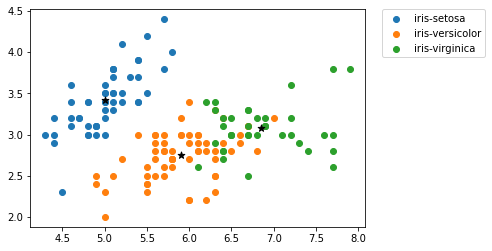

In [6]:
plt.scatter(x[ymean==0,0],x[ymean==0,1],cmap='blue',label='iris-setosa')
plt.scatter(x[ymean==1,0],x[ymean==1,1],cmap='ocean',label='iris-versicolor')
plt.scatter(x[ymean==2,0],x[ymean==2,1],cmap='cool1',label='iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',s=50,c='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## So we can conclude that the given Iris dataset has three clusters, as represented in the above graph with * as their Centroids 